In [3]:
from recommend.model import recommand_model, embedding_model
from recommend.metrics.rmse import rmse
import pandas as pd

In [4]:
train_df = pd.read_pickle("./data/industry_train.pkl")
meta_df = pd.read_pickle("./data/industry_meta.pkl")

In [5]:

meta_df["title"].isna().sum()

0

In [6]:
meta_df

,main_category,title,average_rating,parent_asin
2,Tools & Home Improvement,TEKTON 7165 6-Inch Dial Caliper,3.6,B000NQ4PVG
4,Industrial & Scientific,HiLetgo 20pcs WH148 Single-Joint Potentiometer...,4.6,B07VJ4DNLW
5,Tools & Home Improvement,qiqee Bakery Boxes Halloween Bakery Boxes with...,4.3,B09QPDTQC3
18,Industrial & Scientific,Brute Magnetics 575 lb Magnet Fishing Kit | In...,4.7,B0BQ9NHTJY
28,Amazon Home,"MOJUCRAFT 8 Pack Sanding Sponges, Sanding Bloc...",4.5,B0BZ4CKKGV
...,...,...,...,...
386406,Automotive,Lisle 36510 Carbide Cutter for Ridge Reamer,4.2,B08655RSTL
393876,Industrial & Scientific,12 Pieces Wire Bore Brush Bore Cleaning Brush ...,4.1,B0C6H6S2X7
419778,None,Bonvoisin Digital Lab Scale 600g x 0.01g Preci...,4.4,B09L41DZW1
424012,None,XUUAP 200 pcs(100 Pair) Male Female Spade Conn...,4.4,B09P1NMTLL


In [7]:
meta_df["item_embedding"] = meta_df["title"].apply(lambda x: embedding_model.get_embedding(x))

In [8]:
meta = meta_df[["parent_asin", "item_embedding"]]

In [9]:
meta.to_pickle("industry_meta_embeded.pkl")

In [10]:
train_df = train_df.merge(meta, on=["parent_asin"])

In [11]:
# train_df_history = (
#     train_df
#     .groupby(["user_id", "rating"])["item_embedding"]
#     .apply(lambda x: list(x))  # or use another delimiter if you prefer
#     .reset_index(name="user_all_embeddings")
# )

In [12]:
# from recommend.preprocess.preprocess import pool
# import numpy as np
# train_df_history["user_embedding"] = train_df_history["user_all_embeddings"].apply(lambda x: pool(x))

# user_pivot = train_df_history.pivot(index='user_id', columns='rating', values='user_embedding')
# user_pivot.columns = [f'embedding_{int(float(col))}' for col in user_pivot.columns]
# user_pivot = user_pivot.reset_index()
# for i in range(1, 6):
#     col = f'embedding_{i}'
#     user_pivot[col] = user_pivot[col].apply(
#         lambda x: x if isinstance(x, np.ndarray) else np.zeros(384)
#     )
# user_pivot['user_embedding'] = user_pivot.apply(
#     lambda x: np.array([x[f'embedding_{i}'] for i in range(1, 6)]), 
#     axis=1
# )
# user_pivot.to_pickle("./data/industry_user.pkl")


In [13]:
user_pivot = pd.read_pickle("./data/industry_user.pkl")

In [14]:
join_user  = pd.merge(train_df, user_pivot, on=["user_id"], how="left")
train_df = join_user


In [15]:
test_df = pd.read_pickle("data/industry_test.pkl")
test_df = test_df.merge(meta, on=["parent_asin"])
test_df  = pd.merge(test_df, user_pivot, on=["user_id"], how="left")


valid_df = pd.read_pickle("data/industry_valid.pkl")
valid_df = valid_df.merge(meta, on=["parent_asin"], how='left')
valid_df  = pd.merge(valid_df, user_pivot, on=["user_id"], how="left")


In [16]:
test_df

,user_id,parent_asin,rating,timestamp,item_embedding,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,user_embedding
0,AFNT6ZJCYQN3WDIKUSWHJDXNND2Q,B09HSD6Q22,3.0,2022-10-23 11:01:01.153,"[-0.005886892, 0.050171014, 0.0245841, -0.0721...","[-0.0619223, 0.03118197, 0.023077818, 0.021940...","[0.009784337, -0.049503457, -0.08929599, -0.08...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0014639432, 0.07050564, 0.0015507648, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[-0.06192230060696602, 0.031181970611214638, ..."
1,AFSKPY37N3C43SOI5IEXEK5JSIYA,B0C212RLW1,5.0,2023-01-19 17:42:57.782,"[-0.118701994, 0.02280598, 0.019649945, 0.0075...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.057421166, 0.004792274, -0.09032396, -0.01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.05334721, -0.00016276662, 0.047741264, -0....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,AFZUK3MTBIBEDQOPAK3OATUOUKLA,B08JGFGQXL,5.0,2022-12-24 02:06:18.206,"[-0.09503344, 0.044143047, 0.00029132486, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.096868895, 0.011525033, 0.04305834, 0.0201...","[-0.03512815, 0.03188165, -0.0010271124, 0.007...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,AE2TA5GQH4JI5RQ4W5H5PQOVYBGA,B0B8QGT7TB,3.0,2021-11-18 23:14:32.049,"[-0.054689717, -0.0065410216, -0.059698634, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.047447845, 0.03743106, -0.039480284, 0.000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.066665746, 0.00022422633, 0.007538027, -0....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,AFFZVSTUS3U2ZD22A2NPZSKOCPGQ,B0BYTHL45Q,5.0,2023-03-14 21:58:01.461,"[0.032297187, 0.13035537, 0.0028675762, 0.0462...","[-0.049956724, 0.014420577, 0.026921408, -0.02...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.02788064, 0.013134131, 0.018357782, -0.025...","[-0.025055725, 0.0064748386, -0.0045731617, 0....","[-0.03043283, 0.029921338, 0.019485112, -0.006...","[[-0.04995672404766083, 0.014420577324926853, ..."
...,...,...,...,...,...,...,...,...,...,...,...
43166,AGWK564NJXSOKE2DRP3HPHG5UHMQ,B08CT8TB81,5.0,2020-12-16 19:38:16.503,"[-0.10160145, 0.025024774, 0.034372814, -0.080...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.06879734, 0.019835396, 0.04264748, -0.0541...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
43167,AENS6SFEWFQNJ5TUZ2VLL65L6S2Q,B09J7M565J,5.0,2023-07-19 04:50:57.386,"[-0.106427774, 0.006270404, -0.02375013, -0.05...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.08340851, 0.009966519, 0.007484361, -0.065...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
43168,AEH7PKQS6Z3G7PJLYTSI43JCFL3A,B08LMVQWYF,5.0,2023-01-08 05:45:54.851,"[-0.08822197, 0.026753962, -0.03746442, -0.020...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.031252436, -0.047836345, -0.014081378, -0....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
43169,AGCHQXUWVC7APHHLKPF6555YXBCA,B09T98ZJPQ,5.0,2023-08-25 13:59:13.961,"[-0.08471505, 0.022562183, -0.020437626, -0.01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0

In [17]:
valid_df

,user_id,parent_asin,rating,timestamp,item_embedding,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,user_embedding
0,AFNT6ZJCYQN3WDIKUSWHJDXNND2Q,B0883CDD2Z,4.0,2022-10-07 19:29:27.191,"[-0.058949023, 0.04023988, 0.05501242, -0.0120...","[-0.0619223, 0.03118197, 0.023077818, 0.021940...","[0.009784337, -0.049503457, -0.08929599, -0.08...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0014639432, 0.07050564, 0.0015507648, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[-0.06192230060696602, 0.031181970611214638, ..."
1,AFSKPY37N3C43SOI5IEXEK5JSIYA,B00VMWTUQA,5.0,2022-03-12 11:47:22.319,"[-0.04687411, 0.045856025, 0.024736691, -0.050...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.057421166, 0.004792274, -0.09032396, -0.01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.05334721, -0.00016276662, 0.047741264, -0....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,AFZUK3MTBIBEDQOPAK3OATUOUKLA,B0C5WV4TP8,5.0,2022-11-26 22:29:12.494,"[-0.0035943429, 0.05032014, -0.026565015, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.096868895, 0.011525033, 0.04305834, 0.0201...","[-0.03512815, 0.03188165, -0.0010271124, 0.007...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,AE2TA5GQH4JI5RQ4W5H5PQOVYBGA,B09QMQFBBV,5.0,2020-11-22 13:13:32.386,"[-0.003750352, 0.0398104, -0.04038761, -0.0307...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.047447845, 0.03743106, -0.039480284, 0.000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.066665746, 0.00022422633, 0.007538027, -0....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,AFFZVSTUS3U2ZD22A2NPZSKOCPGQ,B0B8DZT7Q9,5.0,2023-03-14 21:39:37.111,"[-0.01951032, -0.028651437, 0.039849527, -0.05...","[-0.049956724, 0.014420577, 0.026921408, -0.02...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.02788064, 0.013134131, 0.018357782, -0.025...","[-0.025055725, 0.0064748386, -0.0045731617, 0....","[-0.03043283, 0.029921338, 0.019485112, -0.006...","[[-0.04995672404766083, 0.014420577324926853, ..."
...,...,...,...,...,...,...,...,...,...,...,...
38724,AGWK564NJXSOKE2DRP3HPHG5UHMQ,B08FR7VVCJ,5.0,2020-12-16 19:37:03.670,"[-0.061807286, 0.088235244, -0.040748823, 0.00...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.06879734, 0.019835396, 0.04264748, -0.0541...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
38725,AENS6SFEWFQNJ5TUZ2VLL65L6S2Q,B08J72F3SM,5.0,2023-07-19 04:50:10.398,"[-0.112120084, 0.0010373059, -0.051497407, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.08340851, 0.009966519, 0.007484361, -0.065...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
38726,AEH7PKQS6Z3G7PJLYTSI43JCFL3A,B08RD3RDGR,5.0,2023-01-08 05:43:47.645,"[-0.030501576, -0.021887645, -0.05082702, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.031252436, -0.047836345, -0.014081378, -0....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
38727,AGCHQXUWVC7APHHLKPF6555YXBCA,B0C5J5N589,5.0,2022-01-19 13:17:33.386,"[-0.11157755, -0.052389618, -0.03946973, 0.009...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0

In [18]:
train_df

,user_id,parent_asin,rating,timestamp,item_embedding,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,user_embedding
0,AFNT6ZJCYQN3WDIKUSWHJDXNND2Q,B00DX7KEP8,2.0,2019-01-03 17:45:17.929,"[0.009784337, -0.049503457, -0.08929599, -0.08...","[-0.0619223, 0.03118197, 0.023077818, 0.021940...","[0.009784337, -0.049503457, -0.08929599, -0.08...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0014639432, 0.07050564, 0.0015507648, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[-0.06192230060696602, 0.031181970611214638, ..."
1,AFNT6ZJCYQN3WDIKUSWHJDXNND2Q,B098BR67DJ,4.0,2019-11-10 00:03:55.016,"[0.020981751, 0.081066705, -0.025508307, -0.03...","[-0.0619223, 0.03118197, 0.023077818, 0.021940...","[0.009784337, -0.049503457, -0.08929599, -0.08...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0014639432, 0.07050564, 0.0015507648, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[-0.06192230060696602, 0.031181970611214638, ..."
2,AFNT6ZJCYQN3WDIKUSWHJDXNND2Q,B08Y97BK7N,4.0,2022-08-24 13:52:59.714,"[-0.023909638, 0.05994458, 0.028609836, -0.038...","[-0.0619223, 0.03118197, 0.023077818, 0.021940...","[0.009784337, -0.049503457, -0.08929599, -0.08...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0014639432, 0.07050564, 0.0015507648, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[-0.06192230060696602, 0.031181970611214638, ..."
3,AFNT6ZJCYQN3WDIKUSWHJDXNND2Q,B0B6YT7HNF,1.0,2022-08-29 14:23:25.467,"[-0.0619223, 0.03118197, 0.023077818, 0.021940...","[-0.0619223, 0.03118197, 0.023077818, 0.021940...","[0.009784337, -0.049503457, -0.08929599, -0.08...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0014639432, 0.07050564, 0.0015507648, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[-0.06192230060696602, 0.031181970611214638, ..."
4,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07WV7HYWM,3.0,2020-04-13 13:06:06.946,"[-0.057421166, 0.004792274, -0.09032396, -0.01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.057421166, 0.004792274, -0.09032396, -0.01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.05334721, -0.00016276662, 0.047741264, -0....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...,...,...
174152,AGCHQXUWVC7APHHLKPF6555YXBCA,B09FLC1CMC,5.0,2019-04-11 11:35:38.222,"[-0.10624359, -0.049497113, 0.041070387, -0.06...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.02852421, -0.038961284, -0.0095000565, -0....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
174153,AGCHQXUWVC7APHHLKPF6555YXBCA,B07JKGNB6W,5.0,2019-04-25 21:46:40.788,"[0.049195167, -0.028425451, -0.0600705, -0.039...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.02852421, -0.038961284, -0.0095000565, -0....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
174154,AELANO3KUUCCDP7CRCWIHECK3MRA,B09C9Q83LZ,5.0,2021-08-27 14:23:07.656,"[-0.056665376, 0.08595274, -0.03731587, 0.0137...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.060416345, 0.018581271, -0.054318007, -0.0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
174155,AELANO3KUUCCDP7CRCWIHECK3MRA,B09DVYZSYJ,5.0,2023-08-23 15:31:21.411,"[-0.058853064, -0.079279475, -0.018335579, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[

In [19]:
valid_df = valid_df.dropna(subset=["user_embedding"])
valid_df["user_embedding"].isna().sum()

0

In [20]:
print(test_df["user_embedding"].isna().sum())
test_df = test_df.dropna(subset=["user_embedding"])
test_df["user_embedding"].isna().sum()

8826


0

In [21]:
# from recommend.dataset.recommend_dataset import RecommenderDataset
from torch.utils.data import Dataset, DataLoader
import torch
import pandas as pd

class RecommenderDataset(Dataset):
    def __init__(self, df:pd.DataFrame):
        """
        Args:
            df (pandas.DataFrame): DataFrame containing columns:
                'userid', 'parent_asin', 'user_embedding', 'item_embedding', 'rating'
        """
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        # Convert user and item embeddings to PyTorch tensors
        user_emb = torch.tensor(row['user_embedding'], dtype=torch.float32)
        item_emb = torch.tensor(row['item_embedding'], dtype=torch.float32)
        item_emb = item_emb.unsqueeze(0)
        rating = torch.tensor(float(row['rating']), dtype=torch.float32)
        return user_emb, item_emb, rating
    
train_dataset = RecommenderDataset(train_df)
test_dataset = RecommenderDataset(test_df)
valid_dataset = RecommenderDataset(valid_df)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# for i in range(len(valid_dataset)):
#     user_emb, item_emb, rating = valid_dataset[i]
#     if len(user_emb == 0 or item_emb.numel() == 0:
#         print(f"Bad sample at index {i}")
        
# for user_emb, item_emb, rating in valid_loader:
#         print(user_emb.shape, item_emb.shape)


In [22]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [23]:
import numpy as np
def cal_rmse(predictions, ground_truths):    
    return np.sqrt(np.mean((predictions - ground_truths) ** 2))

def validate(model, test_loader, device, verbose=False):
    pred = []
    true_label = []
    with torch.no_grad():
        for user_emb, item_emb, rating in test_loader:
            user_emb = user_emb.to(device)
            item_emb = item_emb.to(device)
            rating = rating.to(device)
            outputs = model(user_emb, item_emb)
            pred.extend(outputs.tolist())
            true_label.extend(rating.tolist())

    predictions = np.array(pred)
    ground_truths = np.array(true_label)
    rmse = cal_rmse(predictions, ground_truths)
    if verbose:
        print("Test RMSE:", rmse)
    return rmse

In [24]:
from recommend.model.simple_mlp import recommand_model
model = recommand_model.to(device)
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = F.mse_loss
train_loss = []
test_loss = []
validate_loss = []

# train_loss.append(validate(model, train_loader, device))
validate_loss.append(validate(model, valid_loader, device))
test_loss.append(validate(model, test_loader, device))


num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for user_emb, item_emb, rating in tqdm(train_loader):
        pred = []
        true_label = []
        user_emb = user_emb.to(device)
        item_emb = item_emb.to(device)
        rating = rating.to(device)
        optimizer.zero_grad()
        outputs = model(user_emb, item_emb)
        
        pred.extend(outputs.tolist())
        true_label.extend(rating.tolist())
        
        loss = criterion(outputs.view(-1), rating.view(-1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # print(outputs.squeeze(), rating)
        # break

    predictions = np.array(pred)
    ground_truths = np.array(true_label)
    rmse = cal_rmse(predictions, ground_truths)
    train_loss.append(rmse)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}")
    # train_loss.append(validate(model, train_loader, device))
    validate_loss.append(validate(model, valid_loader, device))
    test_loss.append(validate(model, test_loader, device))

 18%|█▊        | 1000/5443 [00:09<00:43, 101.25it/s]

100%|██████████| 5443/5443 [00:54<00:00, 99.22it/s] 


Epoch 1/20, Loss: 0.7883


100%|██████████| 5443/5443 [00:53<00:00, 101.58it/s]


Epoch 2/20, Loss: 0.4524


100%|██████████| 5443/5443 [00:53<00:00, 101.88it/s]


Epoch 3/20, Loss: 0.3562


100%|██████████| 5443/5443 [00:52<00:00, 102.86it/s]


Epoch 4/20, Loss: 0.2984


100%|██████████| 5443/5443 [00:50<00:00, 106.99it/s]


Epoch 5/20, Loss: 0.2541


100%|██████████| 5443/5443 [00:54<00:00, 100.24it/s]


Epoch 6/20, Loss: 0.2235


100%|██████████| 5443/5443 [00:56<00:00, 97.18it/s] 


Epoch 7/20, Loss: 0.2038


100%|██████████| 5443/5443 [00:53<00:00, 102.38it/s]


Epoch 8/20, Loss: 0.1872


100%|██████████| 5443/5443 [00:55<00:00, 98.92it/s] 


Epoch 9/20, Loss: 0.1720


100%|██████████| 5443/5443 [00:55<00:00, 98.95it/s] 


Epoch 10/20, Loss: 0.1580


100%|██████████| 5443/5443 [00:55<00:00, 98.07it/s] 


Epoch 11/20, Loss: 0.1478


100%|██████████| 5443/5443 [00:54<00:00, 100.47it/s]


Epoch 12/20, Loss: 0.1379


100%|██████████| 5443/5443 [00:54<00:00, 100.08it/s]


Epoch 13/20, Loss: 0.1322


100%|██████████| 5443/5443 [00:57<00:00, 95.43it/s] 


Epoch 14/20, Loss: 0.1222


100%|██████████| 5443/5443 [00:54<00:00, 100.20it/s]


Epoch 15/20, Loss: 0.1159


100%|██████████| 5443/5443 [00:53<00:00, 101.61it/s]


Epoch 16/20, Loss: 0.1102


100%|██████████| 5443/5443 [00:52<00:00, 104.28it/s]


Epoch 17/20, Loss: 0.1031


100%|██████████| 5443/5443 [00:52<00:00, 103.32it/s]


Epoch 18/20, Loss: 0.1011


100%|██████████| 5443/5443 [00:54<00:00, 99.16it/s] 


Epoch 19/20, Loss: 0.0947


100%|██████████| 5443/5443 [00:51<00:00, 106.15it/s]


Epoch 20/20, Loss: 0.0917


In [26]:
validate_loss

[4.586404832562338,
 1.390919385696711,
 1.3365152266415918,
 1.3530836516759859,
 1.415912884607712,
 1.4473267746945446,
 1.4167322185592865,
 1.4508217514520667,
 1.4296974568787442,
 1.4109292516777727,
 1.4549176040599658,
 1.4079732227390878,
 1.4170083062687266,
 1.462647308103709,
 1.477843268683705,
 1.445470410176664,
 1.4083264009441678,
 1.441395545237463,
 1.4082969099948577,
 1.4532694084397322,
 1.4288126697806052]

21 21 21


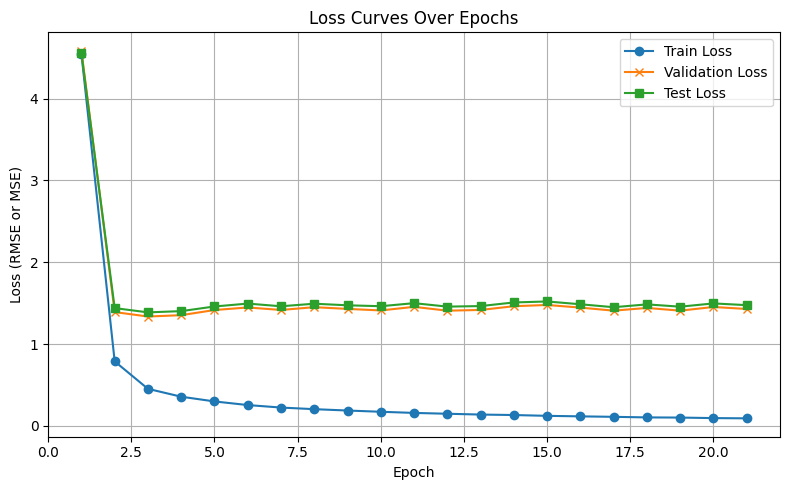

In [32]:
train_loss = [
    4.55,
    0.7883,
    0.4524,
    0.3562,
    0.2984,
    0.2541,
    0.2235,
    0.2038,
    0.1872,
    0.1720,
    0.1580,
    0.1478,
    0.1379,
    0.1322,
    0.1222,
    0.1159,
    0.1102,
    0.1031,
    0.1011,
    0.0947,
    0.0917
]

epochs = range(1, len(train_loss) + 1)
# train_loss.insert(0, 4.5)
print(len(train_loss), len(validate_loss), len(test_loss))
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label="Train Loss", marker='o')
plt.plot(epochs, validate_loss, label="Validation Loss", marker='x')
plt.plot(epochs, test_loss, label="Test Loss", marker='s')

plt.xlabel("Epoch")
plt.ylabel("Loss (RMSE or MSE)")
plt.title("Loss Curves Over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
pred = []
true_label = []
for user_emb, item_emb, rating in test_loader:
    user_emb = user_emb.to(device)
    item_emb = item_emb.to(device)
    rating = rating.to(device)
    outputs = model(user_emb, item_emb)
    pred.extend(outputs.tolist())
    true_label.extend(rating.tolist())
    break

pred[0:5], true_label[0:5]


([[3.740291118621826],
  [4.9854912757873535],
  [4.954109191894531],
  [5.012977123260498],
  [3.6274070739746094]],
 [3.0, 5.0, 5.0, 3.0, 5.0])

In [40]:
test_loss

[4.554249069310655,
 1.4395222452366594,
 1.3873539777358483,
 1.4025226251967735,
 1.459339705479363,
 1.4946602159061981,
 1.4618906749483427,
 1.4931973269124779,
 1.4737217372863238,
 1.4626591817458456,
 1.4998574151324164,
 1.4576814505773041,
 1.4642913587722668,
 1.5086054140784644,
 1.5206335854886377,
 1.4863601277175331,
 1.4504555986438952,
 1.4850085607092105,
 1.456852070913569,
 1.4969139830449876,
 1.4755982128782736]